# Compare highly-rated with low-rated apps

In [2]:
dataset_meta = DatasetMeta(SchemaName.PLAY_STORE, PlayStoreDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
1,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,2018,4
2,2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,1000000,Free,0.0,Everyone,2018,4
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,10000000,Free,0.0,Everyone,2018,4
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,1000000,Free,0.0,Everyone,2018,4
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,10000,Free,0.0,Everyone,2017,2


In [3]:
actions_lst = [
    FilterAction(filtered_column=Column('rating'), filter_operator=FilterOperator.LOWER, filter_term=2.5),
    GroupAction(grouped_column=Column('last_updated'), aggregated_column=Column('reviews'), 
                aggregation_function=AggregationFunction.AVERAGE),
    BackAction(),
    GroupAction(grouped_column=Column('last_updated'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    BackAction(),
    FilterAction(filtered_column=Column('rating'), filter_operator=FilterOperator.GREATER, filter_term=4.7),
    GroupAction(grouped_column=Column('last_updated'), aggregated_column=Column('reviews'), 
                aggregation_function=AggregationFunction.AVERAGE),
    BackAction(),
    GroupAction(grouped_column=Column('last_updated'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    GroupAction(grouped_column=Column('type'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    ]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

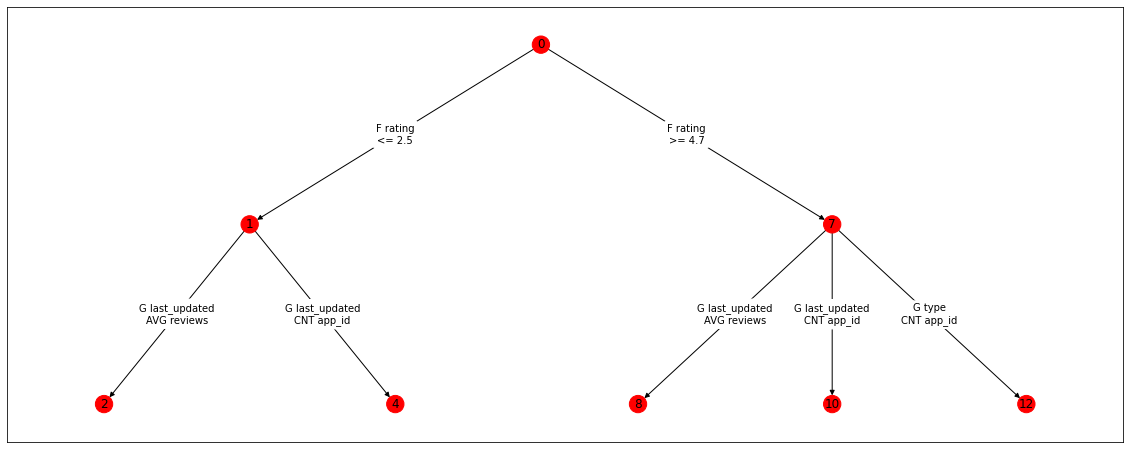

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Filter rating <= 2.5</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
351,351,Just She - Top Lesbian Dating,DATING,1.90,953,19000,1000000,Free,0.00,Mature 17+,2015,5
353,353,EliteSingles – Dating for Single Professionals,DATING,2.50,5377,19000,1000000,Free,0.00,Mature 17+,2016,4
359,359,Sugar Daddy Dating App,DATING,2.50,277,5700,1000000,Free,0.00,Mature 17+,2016,4
379,379,EliteSingles – Dating for Single Professionals,DATING,2.50,5377,19000,1000000,Free,0.00,Mature 17+,2016,4
382,382,Just She - Top Lesbian Dating,DATING,1.90,953,19000,1000000,Free,0.00,Mature 17+,2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7381,7381,Candy simply-Fi,LIFESTYLE,2.10,2390,35000,1000000,Free,0.00,Everyone,2018,4
7441,7441,FK Atlantas,SPORTS,1.50,2,26000,1000,Free,0.00,Everyone,2018,4
7454,7454,Check Lottery Tickets - Florida,FAMILY,2.00,27,31000,10000,Free,0.00,Teen,2016,4
7466,7466,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.00,3,41000,1000,Free,0.00,Everyone,2017,4


### Query 2: <span style="color:DimGray">Filter rating <= 2.5 AND</span> <span style="color:blue;">Group by last_updated AVG(reviews)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 1))

,reviews
last_updated,
2012,1.00
2013,6.00
2014,360.00
2015,725.47
2016,276.54
2017,165.68
2018,228.38


### Query 4: <span style="color:DimGray">Filter rating <= 2.5 AND</span> <span style="color:blue;">Group by last_updated CNT(app_id)</span>

In [7]:
display(prepare_display(action_execution_result_lst, 3))

,app_id
last_updated,
2012,1
2013,1
2014,10
2015,38
2016,61
2017,19
2018,16


### Query 7: <span style="color:blue;">Filter rating >= 4.7</span>

In [8]:
display(prepare_display(action_execution_result_lst, 6))

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8700,10000000,Free,0.00,Everyone,2018,4
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.70,121,3100,10000,Free,0.00,Everyone,2018,4
15,15,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.70,3632,5500,1000000,Free,0.00,Everyone,2018,4
21,21,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.70,7699,4200,1000000,Free,0.00,Everyone 10+,2018,4
22,22,HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.70,118,23000,10000,Free,0.00,Everyone,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7611,7611,Castle Clash: RPG War and Strategy FR,FAMILY,4.70,376223,24000,1000000,Free,0.00,Everyone,2018,4
7612,7612,Fr Lupupa Sermons,BUSINESS,4.80,19,21000,1000,Free,0.00,Everyone,2018,4
7618,7618,Fr. Daoud Lamei,FAMILY,5.00,22,8600,1000,Free,0.00,Teen,2018,4
7624,7624,Chemin (fr),BOOKS_AND_REFERENCE,4.80,44,619,1000,Free,0.00,Everyone,2014,2


### Query 8: <span style="color:DimGray">Filter rating >= 4.7 AND</span> <span style="color:blue;">Group by last_updated AVG(reviews)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 7))

,reviews
last_updated,
2013,15.00
2014,715.67
2015,"1,163.10"
2016,"1,214.40"
2017,"19,970.26"
2018,"76,406.65"


### Query 10: <span style="color:DimGray">Filter rating >= 4.7 AND</span> <span style="color:blue;">Group by last_updated CNT(app_id)</span>

In [10]:
display(prepare_display(action_execution_result_lst, 9))

,app_id
last_updated,
2013,5
2014,12
2015,29
2016,60
2017,188
2018,683


### Query 12: <span style="color:DimGray">Filter rating >= 4.7 AND</span> <span style="color:blue;">Group by type CNT(app_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 11))

,app_id
type,
Free,867
Paid,110
